# 【問題1】仮定関数
# 【問題2】最急降下法
# 【問題3】推定
# 【問題4】目的関数

In [1]:
import numpy as np

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
                    イテレーション数
    lr : float
         学習率
    bias : bool
             バイアス項を入れる場合はTrue
    verbose : bool
                   学習過程を出力する場合はTrue
    lambda_x : float
                     正則化項のλ
      
    Attributes
    ----------
    self.loss : 次の形のndarray, shape (self.iter,)
                   訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
                         検証データに対する損失の記録
    self.theta : None
                     重みの記録
    self.val_theta : None
                          検証データの重みの記録
    """
    
    def __init__(self, num_iter, lr, bias, verbose, lambda_x = 0.01):
        
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lambda_x = lambda_x
                    
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = None
        self.val_theta = None
        

        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
             訓練データ
             
        Returns
        -------
        hx : 次の形のndarray, shape (n_samples, )
              線形の仮定関数による推定結果       
        """
        import numpy as np
        
        # 仮定を投げる
        hx = np.dot(X, self.theta)
                
        # シグモイド関数に通す
        hx = 1/(1+np.exp(-hx)) 
        
        return hx
    
       
        
    def _gradient_descent(self, X, y):
        """
        現在の誤差を算出

        Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                 訓練データ
            y : 次の形のndarray, shape (n_samples, )
                 訓練データの正解値
        """
        m = len(y)
        
        # 誤差算出
        hx = self._linear_hypothesis(X)
        error = hx - y
        
        # 勾配算出
        grad = np.dot(X.T, error) / y.size
         
        # 正則化項を追加し、thetaを更新
        self.theta -= self.lr*grad + (self.lambda_x/(m))*(self.theta)
        
        
    def _gradient_descent_val(self, X, y):
        """
        現在の誤差を算出

        Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                 訓練データ
            y : 次の形のndarray, shape (n_samples, )
                 訓練データの正解値
        """
        # 初期値
        m = len(y)
        
        # 誤差算出
        hx = self._linear_hypothesis(X)
        error = hx - y
        
        # 勾配算出
        grad = np.dot(X.T, error) / y.size
         
        # 正則化項を追加し、thetaを更新
        self.val_theta -= self.lr*grad + (self.lambda_x/(m))*(self.val_theta)
        
        
    def _cost_func(self, X, y):
        
        # コストの値を逐次初期化するために、初期値を設定する
        m = len(y)
        J = 0
        
        # コストを計算する
        hx = self._linear_hypothesis(X)
        J = (1/m) * np.sum((-y*np.log(hx)) - (1-y) * np.log(1 - hx))
        
        # 正則化項を加える        
        J = J + (self.lambda_x/(2*m))*(self.theta**2)
        
        # 平均をとる
        J = np.mean(J)
        
        return J
                
        
    def _cost_func_val(self, X, y):
        
        # コストの値を逐次初期化するために、初期値を設定する
        m = len(y)
        J = 0
        
        # valの重みを使う
        hx = np.dot(X, self.val_theta)
        hx = 1/(1+np.exp(-hx)) 
        J = (1/m) * np.sum((-y*np.log(hx)) - (1-y) * np.log(1 - hx))
        
        # 正則化項を加える        
        J = J + (self.lambda_x/(2*m))*(self.val_theta**2)
        
        # 平均をとる
        J = np.mean(J)
        
        return J
    
    
    # フラグを見てバイアスを加える
    def _add_bias(self, X):
        
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            pass
        
        return X
    
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # bias がTrue ならバイアス項を加える
        X = self._add_bias(X)
        
        # theta の初期値を生成する
        self.theta = np.random.rand(X.shape[1] ) 
        
        # y を{0,1}の２値に変換する
        y = np.array(list(map(lambda x :1 if x > np.median(y) else 0, y)))
        
        
        # 最急降下法によるthetaの更新と、コスト関数による評価を、iter回数分実行する
        for i in range(self.iter):
            
                # i番目のtheta更新
                self._gradient_descent(X, y)
                
                # i番目のコスト算出
                j = self._cost_func(X, y)
                
                # 描画用にコストを配列リストに
                self.loss[i] = j
                
                # verboseがTrueならイテレーション分の処理が見える
                if self.verbose:
                    print(f"theta[{i}]: {self.theta}")
                    print(f"J[{i}]:{j}")
                    print("--------------end of train {}----------------".format(i))
                else:
                    pass
        
        
        # 検証データが入力された場合、同様の処理を検証データに対しても行う
        if X_val is not None and y_val is not None:
            
            X_val = self._add_bias(X_val)
            self.val_theta = np.random.rand(X_val.shape[1] )
            y_val = np.array(list(map(lambda x :1 if x > np.median(y_val) else 0, y_val)))
            
            for i in range(self.iter):
            
                # i番目のtheta更新
                self._gradient_descent_val(X_val, y_val)
                
                # i番目のコスト算出
                j_val = self._cost_func_val(X_val, y_val)
                
                # 描画用にコストを配列リストに
                self.val_loss[i] = j_val
                
                # verboseがTrueならイテレーション分の処理が見える
                if self.verbose:
                    print(f"theta[{i}]: {self.val_theta}")
                    print(f"J[{i}]:{j_val}")
                    print("--------------end of val {}----------------".format(i))
                else:
                    pass
        else:
            pass
        
   
    
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
             サンプル
             
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return np.where(self.predict_proba(X) > 0.5, 2, 1)
    
    
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
             サンプル
             
        Returns
        -------
        hx : 次の形のndarray, shape (n_samples, 1)
              ロジスティック回帰による推定結果
        """
        X = self._add_bias(X)
        hx = np.dot(X, self.theta)
        hx = 1/(1+np.exp(-hx))
        
        return hx

In [3]:
# iris データセット

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df = df[df.Species!=0]

X = df.iloc[:, :4].values
y = df.iloc[:, 4].values

In [4]:
# 検証データ分割

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
# モデルのインスタンス生成

slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=True)

In [6]:
# 学習

slr.fit(X_train, y_train, X_test, y_test)

theta[0]: [0.23835244 0.93892959 0.01486994 0.95874975 0.42670747]
J[0]:5.625983632192469
--------------end of train 0----------------
theta[1]: [ 2.32987572e-01  9.07019086e-01 -7.80607873e-05  9.35822871e-01
  4.19477557e-01]
J[1]:5.441895490194482
--------------end of train 1----------------
theta[2]: [ 0.22762351  0.87511336 -0.01502382  0.91289942  0.41224872]
J[2]:5.257838525637538
--------------end of train 2----------------
theta[3]: [ 0.22226029  0.84321262 -0.02996724  0.88997954  0.40502102]
J[3]:5.073815311835813
--------------end of train 3----------------
theta[4]: [ 0.21689797  0.81131713 -0.0449082   0.86706343  0.39779452]
J[4]:4.889829447197774
--------------end of train 4----------------
theta[5]: [ 0.21153661  0.77942731 -0.05984648  0.84415139  0.39056931]
J[5]:4.70588596938012
--------------end of train 5----------------
theta[6]: [ 0.2061763   0.7475437  -0.07478185  0.82124381  0.38334552]
J[6]:4.521991939125027
--------------end of train 6----------------
theta

theta[208]: [ 0.00842321 -0.18473178 -0.52615557  0.42440004  0.36311809]
J[208]:0.5641292581960395
--------------end of train 208----------------
theta[209]: [ 0.00807773 -0.18545421 -0.52657451  0.42534049  0.36397885]
J[209]:0.5638709672739357
--------------end of train 209----------------
theta[210]: [ 0.00773244 -0.18617615 -0.52699317  0.4262803   0.36483907]
J[210]:0.5636129749978984
--------------end of train 210----------------
theta[211]: [ 0.00738735 -0.18689761 -0.52741155  0.42721947  0.36569876]
J[211]:0.563355280942679
--------------end of train 211----------------
theta[212]: [ 0.00704244 -0.18761857 -0.52782963  0.42815799  0.36655791]
J[212]:0.5630978846836407
--------------end of train 212----------------
theta[213]: [ 0.00669773 -0.18833905 -0.52824743  0.42909587  0.36741653]
J[213]:0.5628407857967592
--------------end of train 213----------------
theta[214]: [ 0.00635321 -0.18905903 -0.52866495  0.4300331   0.36827461]
J[214]:0.562583983858622
--------------end of

theta[407]: [-0.05673722 -0.31934695 -0.60419256  0.59952553  0.52437708]
J[407]:0.5181002323139478
--------------end of train 407----------------
theta[408]: [-0.05704738 -0.31997948 -0.60455924  0.60034792  0.52513915]
J[408]:0.5178937491546944
--------------end of train 408----------------
theta[409]: [-0.05735737 -0.3206116  -0.60492568  0.60116977  0.52590076]
J[409]:0.5176874913099613
--------------end of train 409----------------
theta[410]: [-0.05766721 -0.3212433  -0.60529188  0.60199107  0.52666191]
J[410]:0.5174814584643526
--------------end of train 410----------------
theta[411]: [-0.05797687 -0.32187459 -0.60565784  0.60281183  0.52742261]
J[411]:0.5172756503029594
--------------end of train 411----------------
theta[412]: [-0.05828638 -0.32250547 -0.60602356  0.60363205  0.52818285]
J[412]:0.5170700665113593
--------------end of train 412----------------
theta[413]: [-0.05859572 -0.32313594 -0.60638904  0.60445173  0.52894263]
J[413]:0.5168647067756156
--------------end 

theta[608]: [-0.11595485 -0.43859573 -0.67336224  0.75450176  0.66883467]
J[608]:0.4807358587283702
--------------end of train 608----------------
theta[609]: [-0.11623458 -0.43915152 -0.67368492  0.75522381  0.66951185]
J[609]:0.48056893054189426
--------------end of train 609----------------
theta[610]: [-0.11651416 -0.43970697 -0.6740074   0.7559454   0.67018863]
J[610]:0.4804021731982605
--------------end of train 610----------------
theta[611]: [-0.1167936  -0.44026207 -0.67432969  0.75666654  0.67086503]
J[611]:0.4802355864670488
--------------end of train 611----------------
theta[612]: [-0.11707291 -0.44081682 -0.67465177  0.75738721  0.67154104]
J[612]:0.4800691701181982
--------------end of train 612----------------
theta[613]: [-0.11735207 -0.44137122 -0.67497365  0.75810743  0.67221666]
J[613]:0.4799029239220096
--------------end of train 613----------------
theta[614]: [-0.11763109 -0.44192527 -0.67529534  0.7588272   0.6728919 ]
J[614]:0.4797368476491431
--------------end

theta[804]: [-0.16823671 -0.54118113 -0.73299703  0.8877418   0.79448781]
J[804]:0.451018259297678
--------------end of train 804----------------
theta[805]: [-0.16849098 -0.5416735  -0.7332837   0.88838118  0.79509425]
J[805]:0.45088082659926876
--------------end of train 805----------------
theta[806]: [-0.16874513 -0.54216557 -0.73357019  0.88902017  0.79570036]
J[806]:0.4507435258148357
--------------end of train 806----------------
theta[807]: [-0.16899915 -0.54265735 -0.73385652  0.88965877  0.79630614]
J[807]:0.4506063567746417
--------------end of train 807----------------
theta[808]: [-0.16925306 -0.54314882 -0.73414268  0.89029699  0.79691158]
J[808]:0.4504693193092117
--------------end of train 808----------------
theta[809]: [-0.16950684 -0.54364    -0.73442867  0.89093482  0.79751669]
J[809]:0.4503324132493323
--------------end of train 809----------------
theta[810]: [-0.1697605  -0.54413088 -0.7347145   0.89157226  0.79812146]
J[810]:0.45019563842605176
--------------end

theta[0]: [0.37424002 0.82770571 0.83383005 0.47966586 0.66434654]
J[0]:11.3023608804552
--------------end of val 0----------------
theta[1]: [0.36868321 0.79350944 0.81838325 0.45169193 0.6544734 ]
J[1]:10.887030931172532
--------------end of val 1----------------
theta[2]: [0.36312862 0.75932685 0.80294263 0.42372918 0.64460422]
J[2]:10.471872762701476
--------------end of val 2----------------
theta[3]: [0.35757625 0.72515793 0.78750818 0.39577762 0.63473898]
J[3]:10.056888739276562
--------------end of val 3----------------
theta[4]: [0.3520261  0.69100268 0.7720799  0.36783724 0.62487768]
J[4]:9.642082326416965
--------------end of val 4----------------
theta[5]: [0.34647818 0.65686109 0.7566578  0.33990803 0.61502033]
J[5]:9.22745859871605
--------------end of val 5----------------
theta[6]: [0.34093247 0.62273316 0.74124187 0.31199    0.60516693]
J[6]:8.813024986145317
--------------end of val 6----------------
theta[7]: [0.33538898 0.58861888 0.7258321  0.28408314 0.59531746]
J

theta[206]: [-0.72478164 -5.93560318 -2.22122537 -5.05299515 -1.28835395]
J[206]:0.0027153260650811346
--------------end of val 206----------------
theta[207]: [-0.72989884 -5.96709413 -2.23545015 -5.07875602 -1.29744601]
J[207]:0.002744533237383427
--------------end of val 207----------------
theta[208]: [-0.735014   -5.99857248 -2.24966924 -5.10450659 -1.30653443]
J[208]:0.0027738859522647404
--------------end of val 208----------------
theta[209]: [-0.74012711 -6.03003824 -2.26388265 -5.13024686 -1.31561921]
J[209]:0.002803384025752841
--------------end of val 209----------------
theta[210]: [-0.74523818 -6.06149141 -2.27809037 -5.15597683 -1.32470036]
J[210]:0.002833027274049667
--------------end of val 210----------------
theta[211]: [-0.7503472  -6.092932   -2.2922924  -5.18169651 -1.33377788]
J[211]:0.002862815513531182
--------------end of val 211----------------
theta[212]: [-0.75545417 -6.12436002 -2.30648875 -5.2074059  -1.34285177]
J[212]:0.0028927485607472183
-------------

theta[412]: [ -1.73685787 -12.16385551  -5.0345903  -10.14795818  -3.08657307]
J[412]:0.011553245767219476
--------------end of val 412----------------
theta[413]: [ -1.74157024 -12.19285515  -5.04768974 -10.17168107  -3.09494584]
J[413]:0.011608789635565433
--------------end of val 413----------------
theta[414]: [ -1.74628073 -12.2218432   -5.06078393 -10.19539447  -3.10331526]
J[414]:0.011664444619100356
--------------end of val 414----------------
theta[415]: [ -1.75098934 -12.25081965  -5.07387289 -10.21909838  -3.11168133]
J[415]:0.011720210566733304
--------------end of val 415----------------
theta[416]: [ -1.75569606 -12.27978451  -5.08695661 -10.24279281  -3.12004405]
J[416]:0.01177608732751909
--------------end of val 416----------------
theta[417]: [ -1.7604009  -12.30873778  -5.1000351  -10.26647776  -3.12840343]
J[417]:0.011832074750658126
--------------end of val 417----------------
theta[418]: [ -1.76510385 -12.33767947  -5.11310836 -10.29015324  -3.13675947]
J[418]:0.0

theta[615]: [ -2.65583794 -17.81920003  -7.58916695 -14.7742594   -4.71938242]
J[615]:0.024908965239142624
--------------end of val 615----------------
theta[616]: [ -2.66018273 -17.84593754  -7.60124455 -14.79613176  -4.72710207]
J[616]:0.02498415946002498
--------------end of val 616----------------
theta[617]: [ -2.66452577 -17.87266435  -7.61331733 -14.81799538  -4.73481862]
J[617]:0.02505943694584184
--------------end of val 617----------------
theta[618]: [ -2.66886708 -17.89938047  -7.62538527 -14.83985025  -4.74253209]
J[618]:0.025134797572631273
--------------end of val 618----------------
theta[619]: [ -2.67320665 -17.9260859   -7.63744839 -14.86169638  -4.75024248]
J[619]:0.025210241216553436
--------------end of val 619----------------
theta[620]: [ -2.67754448 -17.95278066  -7.64950668 -14.88353377  -4.75794978]
J[620]:0.02528576775389047
--------------end of val 620----------------
theta[621]: [ -2.68188058 -17.97946473  -7.66156015 -14.90536243  -4.765654  ]
J[621]:0.025

theta[819]: [ -3.50713819 -23.05804724  -9.95560752 -19.05984891  -6.23194079]
J[819]:0.041808104338213255
--------------end of val 819----------------
theta[820]: [ -3.51114245 -23.0826892   -9.96673855 -19.08000704  -6.23905542]
J[820]:0.041897880833696305
--------------end of val 820----------------
theta[821]: [ -3.51514511 -23.10732132  -9.97786513 -19.10015711  -6.24616719]
J[821]:0.04198771769107455
--------------end of val 821----------------
theta[822]: [ -3.51914617 -23.13194358  -9.98898725 -19.12029912  -6.25327612]
J[822]:0.04207761480920062
--------------end of val 822----------------
theta[823]: [ -3.52314563 -23.15655599 -10.00010493 -19.14043307  -6.26038221]
J[823]:0.04216757208702924
--------------end of val 823----------------
theta[824]: [ -3.52714349 -23.18115855 -10.01121816 -19.16055896  -6.26748546]
J[824]:0.04225758942361705
--------------end of val 824----------------
theta[825]: [ -3.53113975 -23.20575127 -10.02232694 -19.18067681  -6.27458586]
J[825]:0.0423

# 【問題5】学習と推定

In [7]:
y_pred_proba = slr.predict_proba(X_test)
y_pred_proba

array([0.68230281, 0.68715332, 0.61065386, 0.5137207 , 0.72923153,
       0.27427195, 0.31014948, 0.7623308 , 0.65741117, 0.6547967 ,
       0.70024096, 0.38820613, 0.68775717, 0.68503453, 0.70024096,
       0.27035942, 0.2789001 , 0.38364006, 0.74551404, 0.37267692,
       0.32635942, 0.55990271, 0.58943241, 0.63746462, 0.31004006])

In [8]:
y_pred = slr.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [9]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

,Accuracy,Precision,Recall,F1
Score,0.96,1.0,0.9,0.947368


# 【問題6】学習曲線のプロット

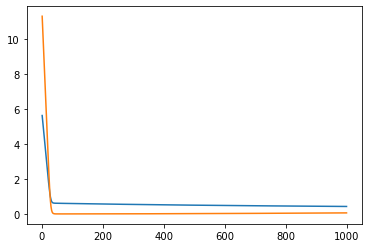

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, slr.iter+1), slr.loss)
plt.plot(np.arange(1, slr.iter+1), slr.val_loss)

# 【問題7】決定領域の可視化

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

    plt.show()

In [13]:
# 特徴量を２つで可視化

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X = X[["sepal_length", "petal_length"]]
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df = df[df.Species!=0]

X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

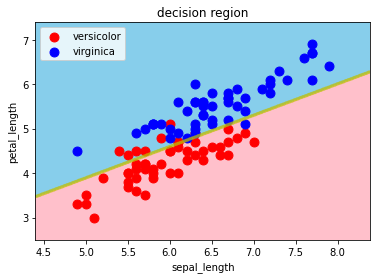

In [14]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
slr.fit(X, y)

decision_region(X, y, slr, title='decision region', xlabel='sepal_length', ylabel='petal_length')

# 【問題8】（アドバンス課題）重みの保存

検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [15]:
# pickle：重みの保存
import pickle

with open('slr_theta.pickle', mode='wb') as fp:
    pickle.dump(slr.theta, fp)

In [16]:
# pickle：読み込み
with open('slr_theta.pickle', mode='rb') as fp:
    slr_theta = pickle.load(fp)
    
print(slr_theta)

[-0.39963866 -0.7523894   1.06797714]


In [17]:
# np.savez：保存
np.savez('np_save', slr.theta)

In [18]:
# np.load：読み込み
print(np.load('np_save.npy'))

[ 0.3916252  -0.83716113  1.01681969]


## scikit_learn 版

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df = df[df.Species!=0]

X = df.iloc[:, :4].values
y = df.iloc[:, 4].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [21]:
# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

,Accuracy,Precision,Recall,F1
Score,0.88,0.818182,0.9,0.857143


In [22]:
print(y_test)
print(y_pred)
print(y_pred_proba)

[2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 2 1]
[2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
[[0.02611883 0.97388117]
 [0.23613363 0.76386637]
 [0.43644319 0.56355681]
 [0.0105737  0.9894263 ]
 [0.02044677 0.97955323]
 [0.97600632 0.02399368]
 [0.73838594 0.26161406]
 [0.05298118 0.94701882]
 [0.54156581 0.45843419]
 [0.09515272 0.90484728]
 [0.29103299 0.70896701]
 [0.96505777 0.03494223]
 [0.76075554 0.23924446]
 [0.02995426 0.97004574]
 [0.29103299 0.70896701]
 [0.97830267 0.02169733]
 [0.99142237 0.00857763]
 [0.94292581 0.05707419]
 [0.0648532  0.9351468 ]
 [0.99482956 0.00517044]
 [0.62137361 0.37862639]
 [0.45831269 0.54168731]
 [0.20262876 0.79737124]
 [0.08331996 0.91668004]
 [0.9821818  0.0178182 ]]
